In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Load the matches dataset
matches_df = pd.read_csv(r"C:\Users\karth\Downloads\Team comparision\matches.csv")


# Display basic information about the dataset
matches_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [14]:
# Fill missing values for numerical columns with 0
matches_df['result_margin'] = matches_df['result_margin'].fillna(0)

# Drop rows where essential fields are missing
matches_df = matches_df.dropna(subset=['winner'])




In [16]:
matches_df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           0
target_overs          0
super_over            0
method             1069
umpire1               0
umpire2               0
dtype: int64

In [20]:
# Standardize team names
team_name_mapping = {
    "Delhi Daredevils": "Delhi Capitals",
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Rising Pune Supergiant": "Rising Pune Supergiants",
    "Kings XI Punjab": "Punjab Kings"
}

matches_df.replace({"team1": team_name_mapping, "Tteam2": team_name_mapping, "winner": team_name_mapping}, inplace=True)


In [22]:
# Count total matches played by each team
matches_played = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()

# Count total matches won by each team
matches_won = matches_df['winner'].value_counts()

# Calculate win percentage
win_percentage = (matches_won / matches_played) * 100
win_percentage = win_percentage.dropna().sort_values(ascending=False)

# Display the win percentage
win_percentage


Punjab Kings                   75.675676
Rising Pune Supergiants        71.428571
Delhi Capitals                 65.714286
Gujarat Titans                 62.222222
Chennai Super Kings            58.227848
Lucknow Super Giants           55.813953
Mumbai Indians                 55.172414
Sunrisers Hyderabad            52.941176
Kolkata Knight Riders          52.191235
Rajasthan Royals               51.141553
Royal Challengers Bangalore    48.945148
Royal Challengers Bengaluru    46.666667
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Pune Warriors                  26.666667
Name: count, dtype: float64

<Figure size 1200x600 with 0 Axes>

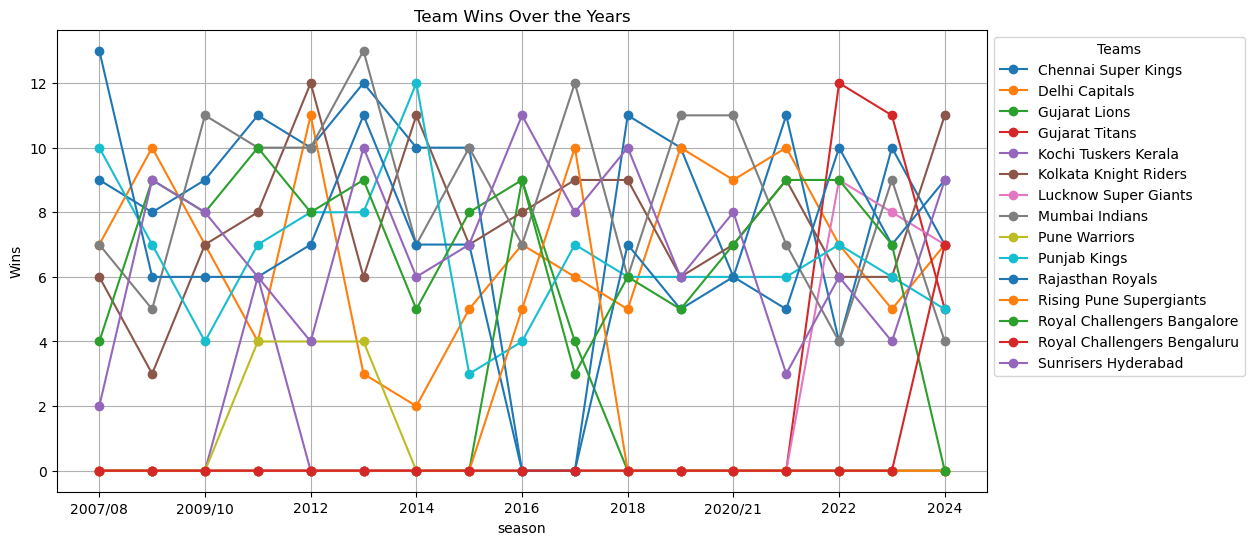

In [24]:
# Group by season and winning team to count wins per season
seasonal_wins = matches_df.groupby(['season', 'winner']).size().unstack(fill_value=0)
# Plot the line chart
plt.figure(figsize=(12, 6))
seasonal_wins.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Team Wins Over the Years")
plt.xlabel("season")
plt.ylabel("Wins")
plt.legend(title="Teams", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()


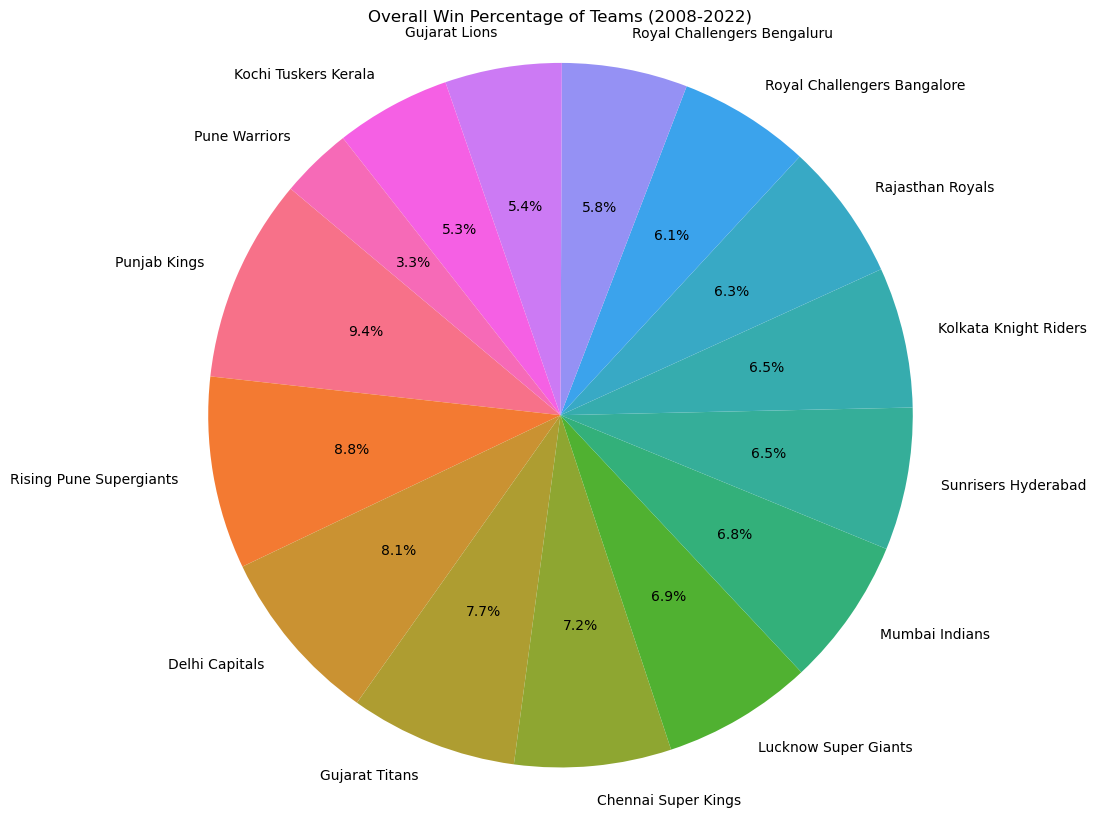

In [26]:
# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(win_percentage, labels=win_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(win_percentage)))
plt.title("Overall Win Percentage of Teams (2008-2022)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [28]:
deliveries_df = pd.read_csv("C:/Users/karth/Downloads/Team comparision/deliveries.csv")


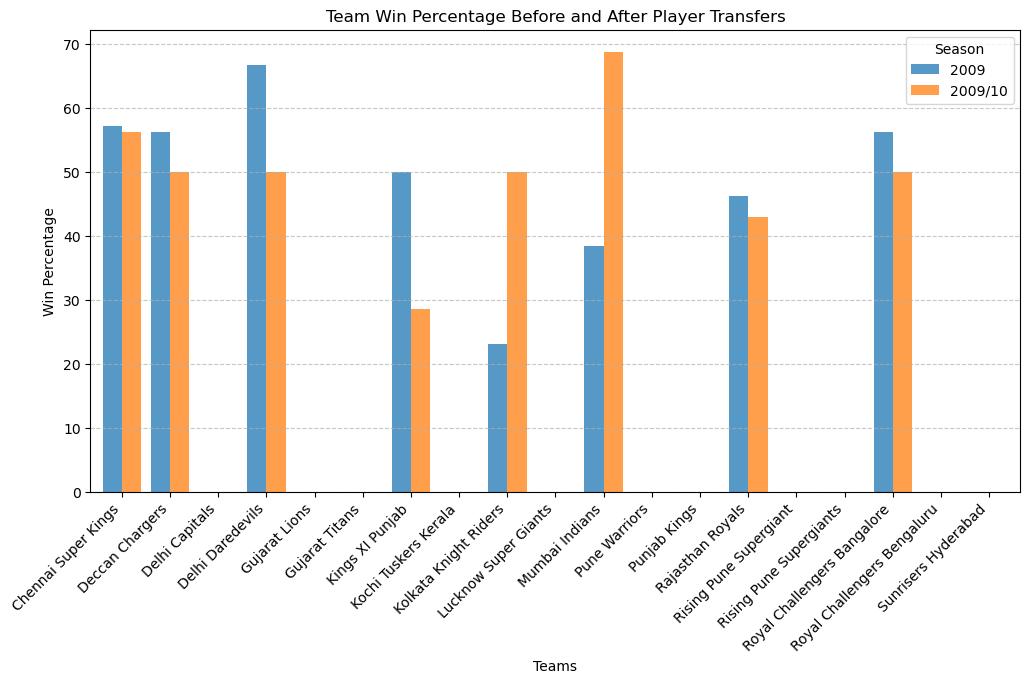

In [59]:
# Extract seasons and unique players for each season
players_by_season = deliveries_df.groupby(
    deliveries_df["match_id"].map(matches_df.set_index("id")["season"])
)["batter"].unique()

# Convert to dictionary format
seasonal_players = {season: set(players) for season, players in players_by_season.items()}

# Identify player transfers
transfers_or_absences = {}
seasons = sorted(seasonal_players.keys())

for i in range(len(seasons) - 1):
    current_season, next_season = seasons[i], seasons[i + 1]
    outgoing_players = seasonal_players[current_season] - seasonal_players[next_season]
    incoming_players = seasonal_players[next_season] - seasonal_players[current_season]
    transfers_or_absences[next_season] = {
        "outgoing": outgoing_players,
        "incoming": incoming_players
    }

# Compute team win percentage per season
matches_df["season"] = matches_df["id"].map(matches_df.set_index("id")["season"])

# Calculate win rates per season and team
win_rates = matches_df.groupby(["season", "winner"]).size().unstack(fill_value=0)

# Calculate matches played per season and team
matches_played = matches_df.groupby("season")[["team1", "team2"]].apply(
    lambda x: x.stack().value_counts()
)
matches_played = matches_played.unstack(fill_value=0)

# Calculate win percentage
win_percentage = (win_rates / matches_played) * 100

# Extract before & after transfer data
sample_seasons = list(transfers_or_absences.keys())[:2]
win_percentage_before_after = win_percentage.loc[sample_seasons]

# Plot win percentage changes
win_percentage_before_after.T.plot(kind="bar", figsize=(12, 6), alpha=0.75, width=0.8)
plt.title("Team Win Percentage Before and After Player Transfers")
plt.xlabel("Teams")
plt.ylabel("Win Percentage")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Season")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


